In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:

import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels
from spinexchange import SpinExChannels


In [3]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)


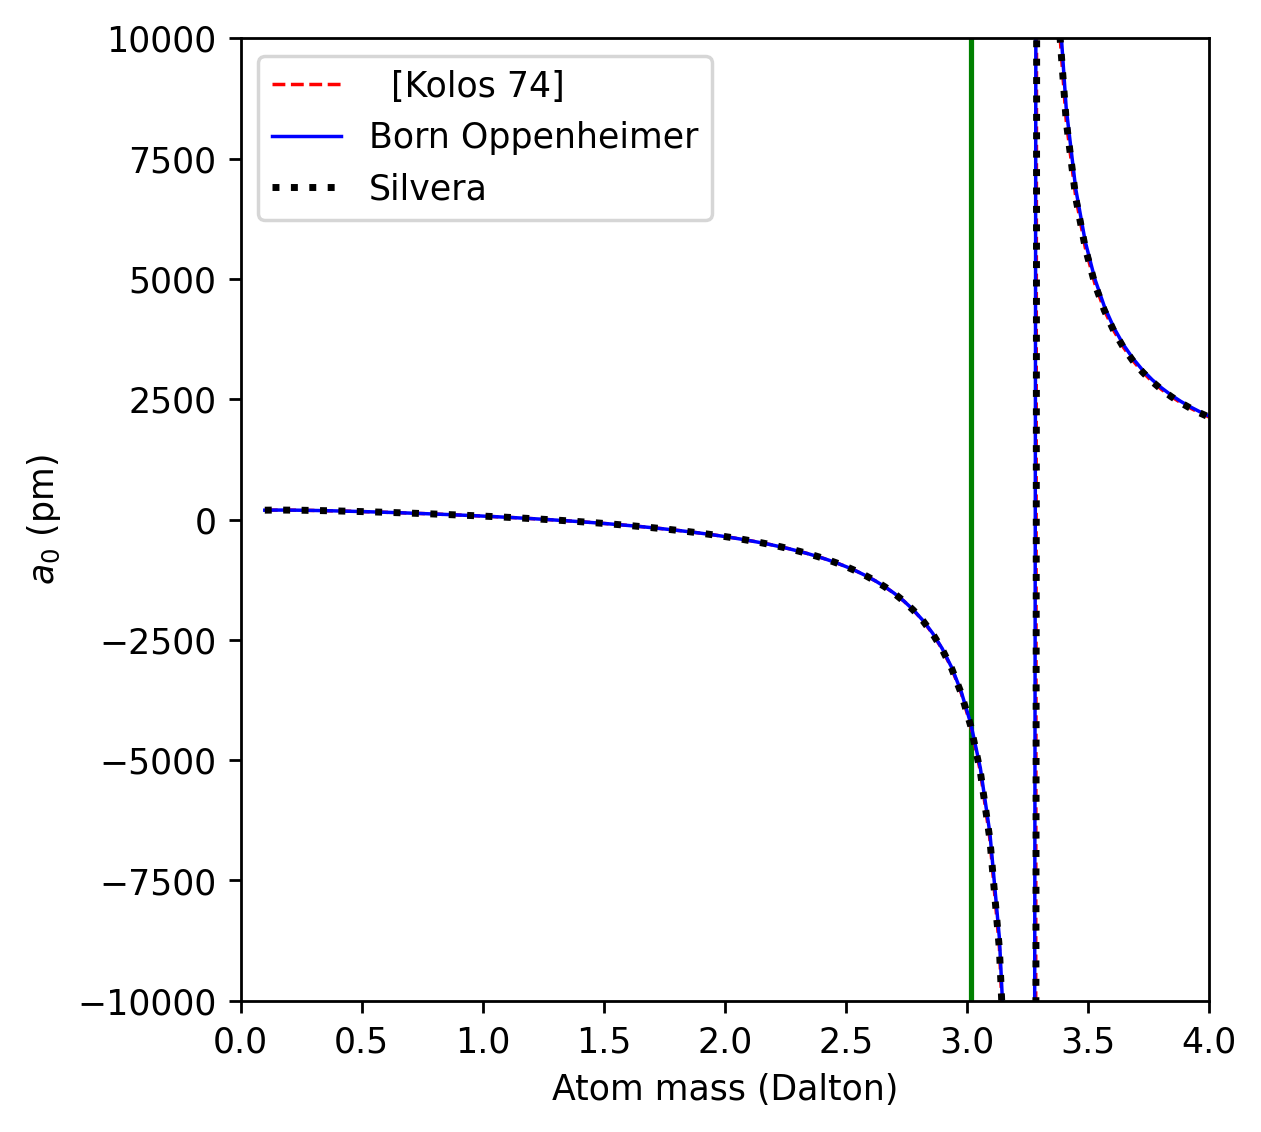

In [4]:

colors=['red','blue','black','orange']
LineStyles=['--','-',':','-.']
linewidths=[1,1,2,1]
Labels=['  [Kolos 74]','Born Oppenheimer', 'Silvera']
ms=np.linspace(0.1,4,100)
plt.figure(figsize=(5,5),dpi=250)
i=0
mH=constants.HydrogenConstants.mu/constants.DaltonInEV*2
mT=constants.TritiumConstants.mu/constants.DaltonInEV*2
#plt.plot([mH,mH],[-100000,45000],'-',color='DarkGreen')
plt.plot([mT,mT],[-100000,45000],'-',color='green')
for trip in potentials.TripletsH.keys():
    aVsM=[]

    for m in ms:
        # We need to adiabatically correct each potential. Remove H correction (-1) then add (1/m) scaled one.
        def AdCorrectedPotential(R):
            return(potentials.ApplyCorrection(R, potentials.TripletsH[trip], potentials.TripletCorrection, (-1+1/m)))

        # get the reduced mass for each mass
        mu=m*constants.DaltonInEV/2

        #Find the scattering length
        aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, AdCorrectedPotential, 'Radau')[-1]*constants.hcInEVAngstrom*100)
    plt.plot(ms,aVsM,color=colors[i],linestyle=LineStyles[i],linewidth=linewidths[i],label=Labels[i])
    i=i+1

plt.xlabel("Atom mass (Dalton)")
plt.ylabel(r"$a_0$ (pm)")

plt.ylim(-10000,10000)
plt.xlim(0,4)
#plt.grid(which='both')
plt.legend(loc='upper left')
plt.savefig("./Plots/PotentialComparisonElastic.png",bbox_inches='tight',dpi=250)


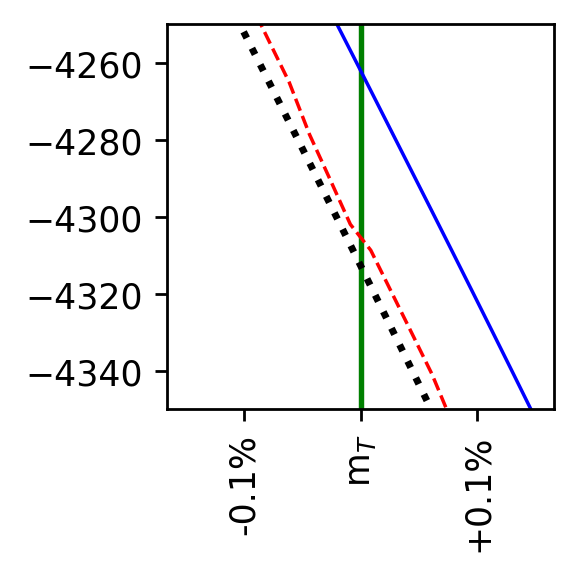

In [5]:
colors=['red','blue','black','orange']
LineStyles=['--','-',':','-.']
linewidths=[1,1,2,1]
ms=np.linspace(mT-0.005,mT+0.005,20)
plt.figure(figsize=(2,2),dpi=250)
i=0
mT=constants.TritiumConstants.mu/constants.DaltonInEV*2
mH=constants.TritiumConstants.mu/constants.DaltonInEV*2
plt.plot([mH,mH],[-100000,45000],'-',color='DarkGreen')
plt.plot([mT,mT],[-100000,45000],'-',color='green')
for trip in potentials.TripletsH.keys():
    aVsM=[]

    for m in ms:
        # We need to adiabatically correct each potential. Remove H correction (-1) then add (1/m) scaled one.
        def AdCorrectedPotential(R):
            return(potentials.ApplyCorrection(R, potentials.TripletsH[trip], potentials.TripletCorrection, (-1+1/m)))

        # get the reduced mass for each mass
        mu=m*constants.DaltonInEV/2

        #Find the scattering length
        aVsM.append(elastic.GetScatteringLength(rhos, pin, 0, mu, AdCorrectedPotential, 'Radau')[-1]*constants.hcInEVAngstrom*100)
    plt.plot(ms,aVsM,label=trip,color=colors[i],linestyle=LineStyles[i],linewidth=linewidths[i])
    i=i+1

#plt.xlabel("Atom mass (Dalton)")
#plt.ylabel(r"$a_0$ (pm)")
plt.xticks([mT*0.999,mT,mT*1.001 ],["-0.1%","m$_T$","+0.1%"],rotation=90)
plt.ylim(-4350,-4250)
plt.xlim(mT-0.005,mT+0.005)
plt.savefig("./Plots/AdiabaticCorrElasticZoomed.png",bbox_inches='tight',dpi=250)

#plt.grid(which='both')
#plt.legend(loc='lower left')

In [6]:
mT*1.001
mT*0.999

3.0130332307199996

In [7]:
print("Potential, With ad correction, no ad correction, ratio")
print()
print("Tritium:")
for trip in potentials.Triplets.keys():
    mu=m*constants.DaltonInEV/2
    withad=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.TripletsT[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    noad=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.Triplets[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100

    print(trip, withad,noad, withad/noad)
print()
print("Hydrogen:")
for trip in potentials.Triplets.keys():
    mu=m*constants.DaltonInEV/2
    withad=elastic.GetScatteringLength(rhos, pin, 0, constants.HydrogenConstants.mu, potentials.TripletsT[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    noad=elastic.GetScatteringLength(rhos, pin, 0, constants.HydrogenConstants.mu, potentials.Triplets[trip], 'Radau')[-1]*constants.hcInEVAngstrom*100
    print(trip, withad,noad, withad/noad)



Potential, With ad correction, no ad correction, ratio

Tritium:
Kolos 74 -4304.261092870789 -4226.6703680766 1.0183574109256828
Silvera -4262.948801998648 -4184.923693386094 1.0186443324488488
Jamieson -4313.086930935596 -4480.642166381607 0.9626046380799647

Hydrogen:
Kolos 74 71.08022215179305 71.44749555435719 0.9948595342675837
Silvera 70.95839922189333 71.32577773182905 0.9948492884113092
Jamieson 71.03631561713145 70.23913096681936 1.0113495802032157


In [8]:
a1=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.Jamieson_Triplet_HFD, 'Radau')[-1]*constants.hcInEVAngstrom*100

In [9]:
a2=elastic.GetScatteringLength(rhos, pin, 0, constants.TritiumConstants.mu, potentials.Jamieson_Triplet_VDW, 'Radau')[-1]*constants.hcInEVAngstrom*100

In [10]:
a2/a1

np.float64(1.0051138914454991)

/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: divide by zero encountered in matmul
  Rets[m]=TransformMatrix(np.matmul(np.matmul(TripletProj,SigMatrix),TripletProj),Rotator)
/Users/benjpjones/PycharmProjects/AtomicHScattering/examples/../src/AtomicH/spinbasis.py:283: RuntimeWarning: overflow encountered in matmul
  Ret

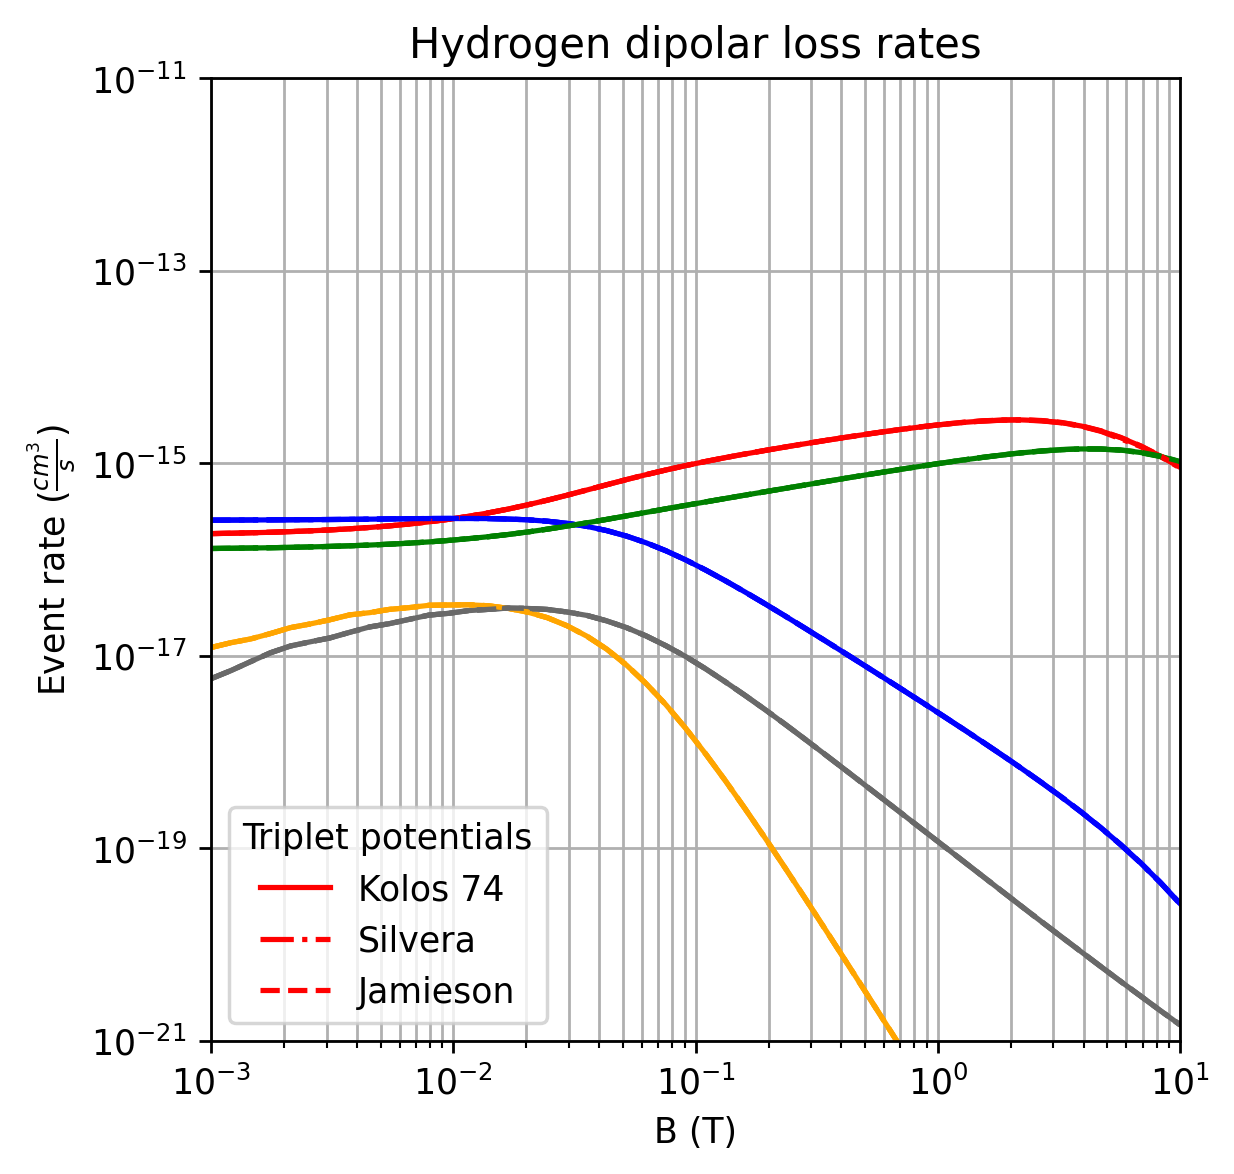

In [11]:
B_values = np.logspace(-3,1,50)
pot      = potentials.Silvera_Triplet
T        = 5e-4

colors=['red','blue','green','orange','dimgrey']
linetypes=['-','-.','--',':']
plt.figure(figsize=(5,5),dpi=250)

pi=0
for pot in potentials.Triplets.keys():
    TripletPotential=potentials.Triplets[pot]
    ci=0
    for c in DipoleChannels:
        LossesT=[]
        for B in B_values:
            LossesT.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants(), T, potentials.Triplets[pot],rhos=np.linspace(1e-9,0.75,2000)))
        if(ci==0):
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci],label=pot)
        else:
            plt.plot(B_values,LossesT,linetypes[pi],color=colors[ci])
        ci=ci+1
    pi=pi+1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen dipolar loss rates")
plt.grid(which='both')
plt.legend(loc='lower left',title='Triplet potentials')
plt.loglog()
plt.savefig("./Plots/AdiabaticCorrDipole.png",bbox_inches='tight',dpi=250)

plt.show()

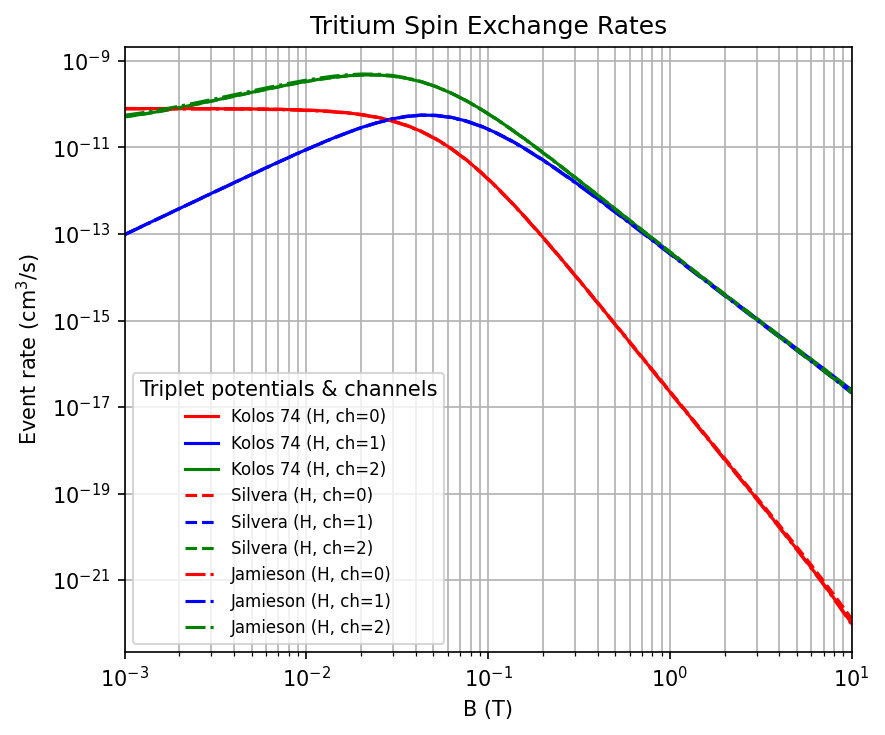

In [12]:
B_values = np.logspace(-3, 1, 50)
potS = potentials.Kolos_Singlet2_VDW
T = 1e-5

colors = ['red', 'blue', 'green', 'purple', 'orange']
linetypes = ['-', '--', '-.', ':', '-']

plt.figure(figsize=(6, 5), dpi=150)

pi = 0
for triplet_key in potentials.Triplets.keys():
    potT = potentials.Triplets[triplet_key] 
    ci = 0
    for c in SpinExChannels:
        Losses_H = [spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T,
                potT, potS, np.linspace(1e-9, .75, 20000))
            for B in B_values]


        plt.plot(B_values, Losses_H,
            linestyle=linetypes[pi % len(linetypes)],
            color=colors[ci % len(colors)],
            label=f"{triplet_key} (H, ch={ci})")

        ci += 1
    pi += 1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\mathrm{cm^3/s}$)')
plt.title("Tritium Spin Exchange Rates")
plt.grid(which='both')
plt.legend(loc='lower left', title='Triplet potentials & channels', fontsize=8)
plt.loglog()
plt.tight_layout()
plt.savefig("./Plots/PotentialCorrSpinEx_Triplet.png",bbox_inches='tight',dpi=250)

plt.show()

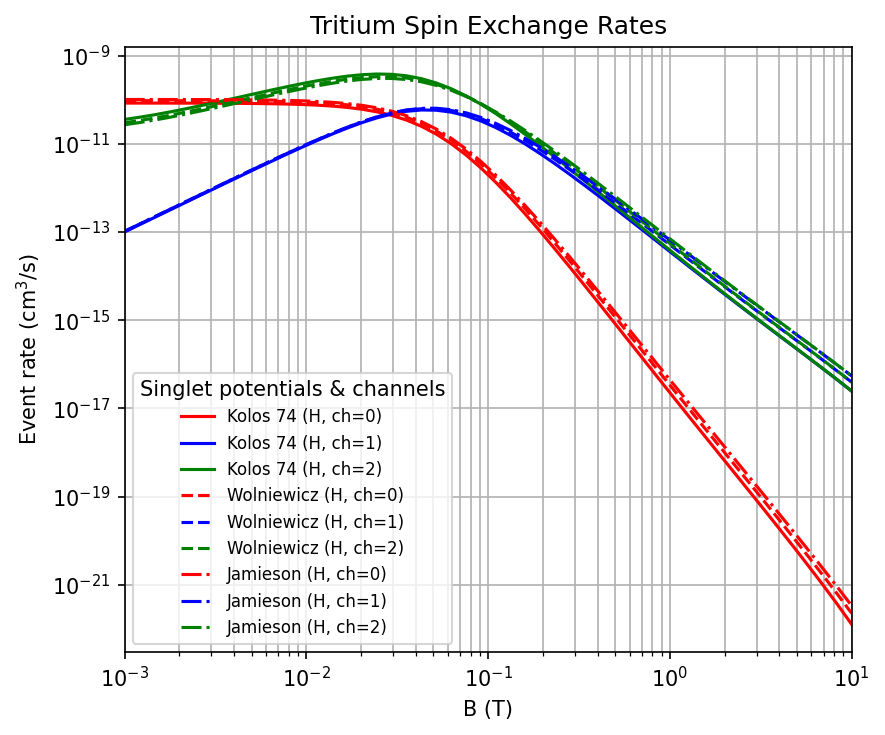

In [13]:
B_values = np.logspace(-3, 1, 50)
potT = potentials.Silvera_Triplet
T = 1e-5

colors = ['red', 'blue', 'green', 'purple', 'orange']
linetypes = ['-', '--', '-.', ':', '-']

plt.figure(figsize=(6, 5), dpi=150)

pi = 0
for singlet_key in potentials.Singlets.keys():
    potS = potentials.Singlets[singlet_key] 
    ci = 0
    for c in SpinExChannels:
        Losses_H = [spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T,
                potT, potS, np.linspace(1e-9, 20*constants.BohrInAng/constants.hcInEVAngstrom, 2000))
            for B in B_values]


        plt.plot(B_values, Losses_H,
            linestyle=linetypes[pi % len(linetypes)],
            color=colors[ci % len(colors)],
            label=f"{singlet_key} (H, ch={ci})")

        ci += 1
    pi += 1
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\mathrm{cm^3/s}$)')
plt.title("Tritium Spin Exchange Rates")
plt.grid(which='both')
plt.legend(loc='lower left', title='Singlet potentials & channels', fontsize=8)
plt.loglog()
plt.tight_layout()
plt.savefig("./Plots/PotentialCorrSpinEx_Singlet.png",bbox_inches='tight',dpi=250)

plt.show()

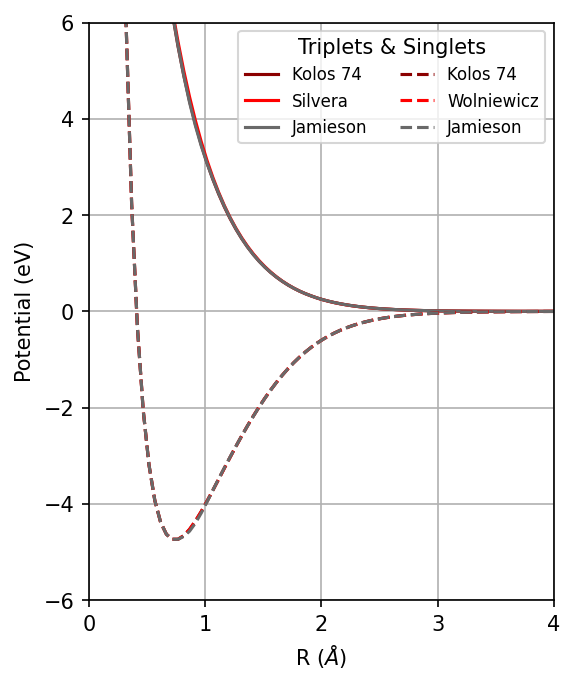

In [14]:
R = np.linspace(0, 0.0025, 100) + 1e-5  # in natural units
R_angstrom = R * constants.hcInEVAngstrom  # convert to Angstrom

Singlets = potentials.Singlets.keys()
Triplets = potentials.Triplets.keys()

plt.figure(figsize=(4, 5), dpi=150)

# Define colors and styles
singlet_styles = ['--'] * len(Singlets)
triplet_styles = ['-'] * len(Triplets)
colors = ['DarkRed', 'red', 'dimgrey', 'orange', 'DarkGreen', 'purple', 'black']

# Plot Triplet Potentials
for i, key in enumerate(Triplets):
    color = colors[i % len(colors)]
    plt.plot(R_angstrom, potentials.TripletsT[key](R), triplet_styles[i % len(triplet_styles)],
             label=key, color=color)

# Plot Singlet Potentials
for i, key in enumerate(Singlets):
    color = colors[i % len(colors)]
    plt.plot(R_angstrom, potentials.SingletsT[key](R), singlet_styles[i % len(singlet_styles)],
             label=key, color=color)

plt.xlim(0, 4)
plt.ylim(-6, 6)
plt.xlabel(r"R ($\AA$)")
plt.ylabel("Potential (eV)")
plt.legend(loc='upper right', ncol=2, fontsize=8, title='Triplets & Singlets')
plt.grid(True)
plt.show()


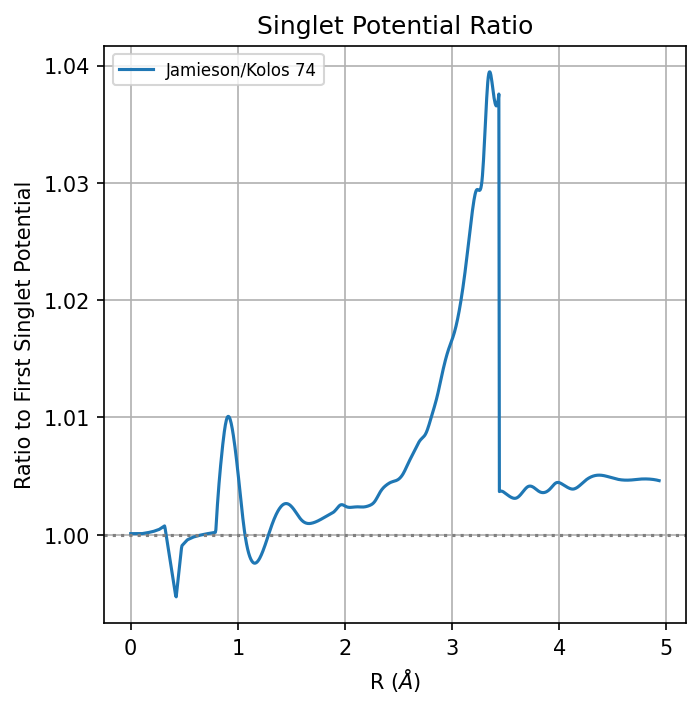

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define distance array (in natural units) and convert to Angstrom
R = np.linspace(0, 0.0025, 1000) + 1e-8
R_angstrom = R * constants.hcInEVAngstrom

# Get the ordered list of singlet keys
singlet_keys = list(potentials.Singlets.keys())
reference_key = singlet_keys[0]      # First singlet is the reference
target_key = singlet_keys[-1]        # Last singlet is the one to compare

# Get the reference and target potentials
V_ref = potentials.SingletsT[reference_key](R)
V_target = potentials.SingletsT[target_key](R)

# Calculate ratio
ratio = V_target / V_ref

# Plot
plt.figure(figsize=(5, 5), dpi=150)
plt.plot(R_angstrom, ratio, label=f'{target_key}/{reference_key}')

plt.axhline(1, linestyle=':', color='gray')  # Reference line
plt.xlabel(r"R ($\AA$)")
plt.ylabel("Ratio to First Singlet Potential")
plt.title("Singlet Potential Ratio")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()


